The variants for this assignments are the following:

1. Compute the norm in two successive steps: parallelisation of matrix multiplication, then parallelisation of matrix norm computation
2. Left matrix is horizontally partitioned
3. Compute 1-norm (maximum absolute column sum norm)

Command `cat /proc/cpuinfo` displays 16 processors, therefore `p` will be 16 for the parallel programs. 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.gridspec as gridspec

plt.style.use('ggplot')

# Benchmarks of parallel and serial programs for difference matrix size

## Benchmark of parallel programs

In [9]:
parallel = pd.read_csv("data_parallel.csv")
parallel

,filename,matrix_size,nb_threads,timing
0,matrixnorm.out,16,16,0.002613
1,matrixnorm.out,32,16,0.003028
2,matrixnorm.out,64,16,0.003179
3,matrixnorm.out,128,16,0.003454
4,matrixnorm.out,256,16,0.003391
5,matrixnorm.out,512,16,0.014273
6,matrixnorm.out,1024,16,0.054600
7,matrixnorm.out,2048,16,0.304863
8,matrixnorm.out,4096,16,3.092737
9,matrixnorm.out,8192,16,22.181388


## Benchmark of serial programs

In [10]:
serial = pd.read_csv("data_serial.csv")
serial

,filename,matrix_size,nb_threads,timing
0,matrixnorm_serial.out,16,1,0.000028
1,matrixnorm_serial.out,32,1,0.000052
2,matrixnorm_serial.out,64,1,0.000200
3,matrixnorm_serial.out,128,1,0.000806
4,matrixnorm_serial.out,256,1,0.004914
5,matrixnorm_serial.out,512,1,0.032421
6,matrixnorm_serial.out,1024,1,0.246230
7,matrixnorm_serial.out,2048,1,1.863570
8,matrixnorm_serial.out,4096,1,16.219560
9,matrixnorm_serial.out,8192,1,120.093703


# Dependence of the execution time of the program on the matrix size n

Text(0.5, 1.0, 'Execution time of parallel programs in function of the matrix size')

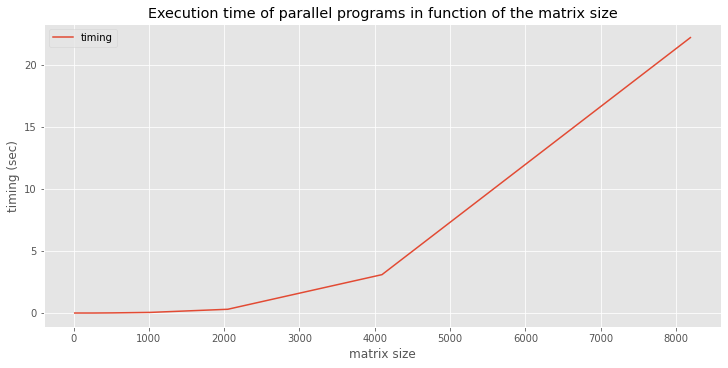

In [11]:
fig = plt.figure(constrained_layout=True, figsize=(10, 5))
ax = fig.add_subplot(111)
parallel.plot.line(x='matrix_size', y='timing', ax=ax)
ax.set_xlabel('matrix size')
ax.set_ylabel('timing (sec)')
ax.set_title('Execution time of parallel programs in function of the matrix size')

# Speedup over a serial counterpart of the program

Speedup is calculated as follows: 
$$S(m) = \frac{T_{serial}(m)}{T_{parallel}(m)}$$ 
where $m$ is matrix size

In [12]:
parallel['speedup'] = serial['timing'] / parallel['timing']
parallel

,filename,matrix_size,nb_threads,timing,speedup
0,matrixnorm.out,16,16,0.002613,0.010669
1,matrixnorm.out,32,16,0.003028,0.017028
2,matrixnorm.out,64,16,0.003179,0.062768
3,matrixnorm.out,128,16,0.003454,0.233375
4,matrixnorm.out,256,16,0.003391,1.449025
5,matrixnorm.out,512,16,0.014273,2.271476
6,matrixnorm.out,1024,16,0.054600,4.509736
7,matrixnorm.out,2048,16,0.304863,6.112822
8,matrixnorm.out,4096,16,3.092737,5.244403
9,matrixnorm.out,8192,16,22.181388,5.414165


Text(0.5, 1.0, 'Speedup of parallel programs over their serial counterparts')

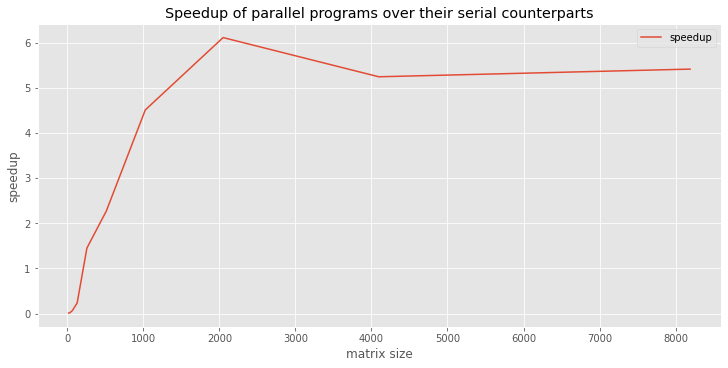

In [13]:
fig = plt.figure(constrained_layout=True, figsize=(10, 5))
ax = fig.add_subplot(111)
parallel.plot.line(x='matrix_size', y='speedup', ax=ax)
ax.set_xlabel('matrix size')
ax.set_ylabel('speedup')
ax.set_title('Speedup of parallel programs over their serial counterparts')

The results show that we have significant speedup for matrix of size n > 200 and the speedup stabilises around 5.5 for bigger matrices. 

The parallelisation is inefficient for small matrices as it reduces the processing speed. This problem stems from the overhead of creating and initializing new threads.

Speedup stabilisation for matrix of size n > 2000 is due to the fact that this overhead cost is negligible compared to the computation time of matrix slices.